In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt
from shapely.geometry import Polygon
import pandas as pd
import osmnx as ox


In [2]:
noise = gpd.read_file("data/noise.zip")
transport_lines = gpd.read_file("data/transport_lines.zip")
metro_entrences = gpd.read_file("data/metro_entrences.zip")
#roadss = gpd.read_file("data/roads.zip")
#roads = pd.read_csv("data/roads.csv", encoding="utf-8")
pictures = gpd.read_file("data/podzial_na_obrazki.csv")

In [4]:
city = "Praha"
roads = ox.graph_from_place(city, network_type="drive")

# Extract roads and their attributes
roads = ox.graph_to_gdfs(roads, nodes=False, edges=True)

In [5]:
roads.dtypes

osmid         object
highway       object
lanes         object
name          object
oneway          bool
reversed      object
length       float64
geometry    geometry
maxspeed      object
tunnel        object
ref           object
access        object
bridge        object
junction      object
width         object
area          object
dtype: object

In [8]:
noise.crs

<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Czechia; Slovakia.
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

In [10]:
roads = roads.to_crs(noise.crs)

In [12]:
roads.crs

<Projected CRS: EPSG:5514>
Name: S-JTSK / Krovak East North
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Czechia; Slovakia.
- bounds: (12.09, 47.73, 22.56, 51.06)
Coordinate Operation:
- name: Krovak East North (Greenwich)
- method: Krovak (North Orientated)
Datum: System of the Unified Trigonometrical Cadastral Network
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich

C:\Users\kajet\AppData\Local\Temp\ipykernel_22952\1210919062.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


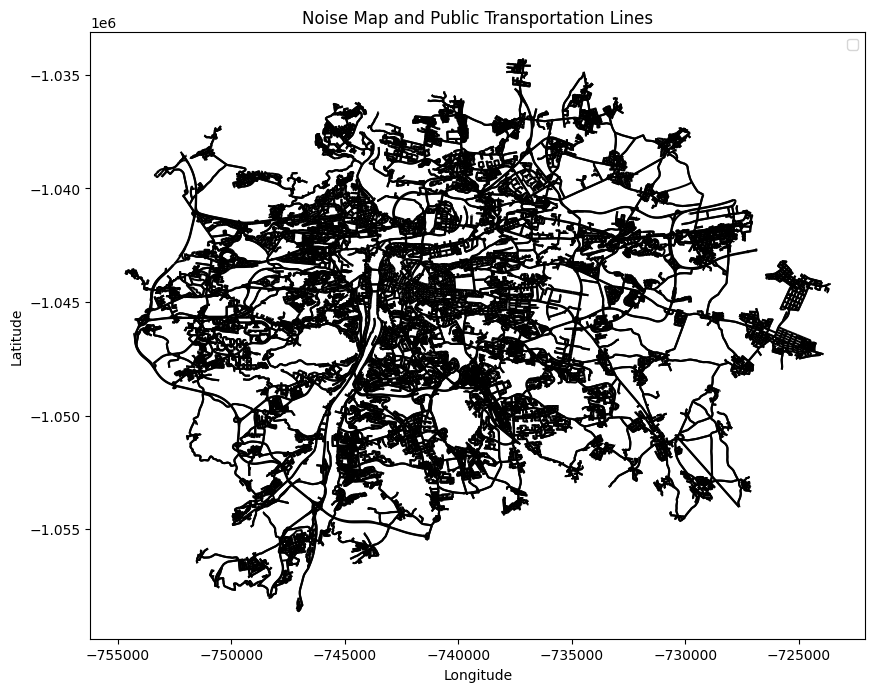

In [13]:
fig, ax = plt.subplots(figsize=(10, 10))


roads.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [18]:
def parse_polygon(polygon_string):
    try:
        # Remove "POLYGON ((" and "))", then split coordinates
        coords_string = polygon_string.replace("POLYGON ((", "").replace("))", "")
        coords = [
            tuple(map(float, coord.split()))  # Convert each pair into a tuple of floats
            for coord in coords_string.split(", ")
        ]
        return Polygon(coords)  # Create Shapely Polygon
    except Exception as e:
        # Handle errors (e.g., malformed strings)
        print(f"Error parsing polygon: {polygon_string}, error: {e}")
        return None

In [19]:
pictures

,geometry
0,POLYGON ((-746187.4291304341 -1058799.60000000...
1,POLYGON ((-747663.5678260861 -1058799.60000000...
2,POLYGON ((-749139.7065217382 -1058799.60000000...
3,POLYGON ((-750615.8452173902 -1058799.60000000...
4,POLYGON ((-752091.9839130423 -1055715.05750000...
...,...
257,POLYGON ((-740282.8743478258 -1034123.26000000...
258,POLYGON ((-738806.7356521736 -1034123.26000000...
259,POLYGON ((-737330.5969565216 -1034123.26000000...
260,POLYGON ((-735854.4582608695 -1034123.26000000...


In [20]:
pictures = gpd.GeoDataFrame(pictures).rename(columns={0: "geometry"})

In [21]:
pictures.dtypes

geometry    object
dtype: object

In [22]:
pictures["geometry"] = pictures["geometry"].apply(parse_polygon)
df = pictures.dropna(subset=["geometry"])

In [23]:
pictures.set_geometry('geometry', inplace=True)

In [24]:
pictures.dtypes

geometry    geometry
dtype: object

C:\Users\kajet\AppData\Local\Temp\ipykernel_8164\1195018545.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


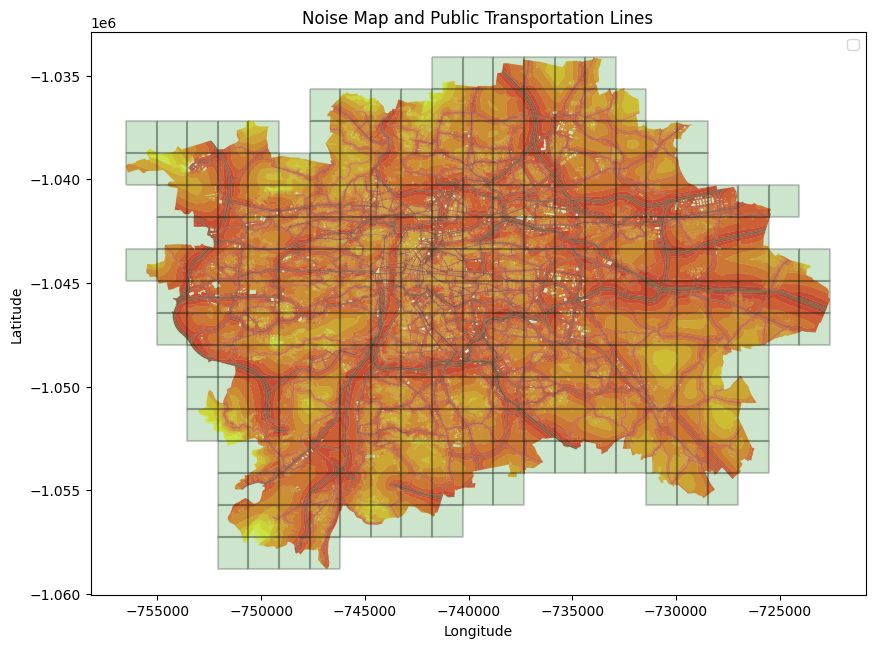

In [112]:
fig, ax = plt.subplots(figsize=(10, 10))

noise.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

pictures.plot(ax=ax, alpha = 0.2, color="green",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [113]:
import numpy as np

In [25]:
picture = pictures['geometry'][70]

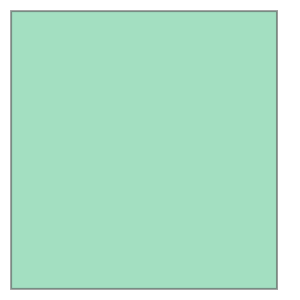

In [26]:
picture

In [27]:
noise_for_pixel = gpd.clip(noise, picture)


In [28]:
noise_for_pixel

,DB_LO,DB_HI,SHAPE_LEN,geometry
0,5.0,10.0,7.617187e+05,"MULTIPOLYGON (((-741660 -1049619.094, -741659...."
1,10.0,15.0,8.163733e+05,"MULTIPOLYGON (((-741660 -1049618.227, -741658...."
2,15.0,20.0,8.648527e+05,"MULTIPOLYGON (((-741660 -1049617.361, -741657...."
3,20.0,25.0,9.233291e+05,"MULTIPOLYGON (((-741660 -1049616.494, -741656...."
4,25.0,30.0,1.016043e+06,"MULTIPOLYGON (((-741660 -1049615.628, -741656...."
5,30.0,35.0,1.280995e+06,"MULTIPOLYGON (((-740512.151 -1050670, -740510 ..."
6,35.0,40.0,2.186663e+06,"MULTIPOLYGON (((-740290 -1050914.779, -740294...."
17,0.0,5.0,1.958162e+05,"MULTIPOLYGON (((-741670 -1049679.949, -741660 ..."
13,70.0,75.0,1.423969e+06,"MULTIPOLYGON (((-741249.533 -1049550, -741250 ..."
12,65.0,70.0,2.777230e+06,"MULTIPOLYGON (((-741228.807 -1049550, -741230 ..."


C:\Users\kajet\AppData\Local\Temp\ipykernel_22952\3012404049.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


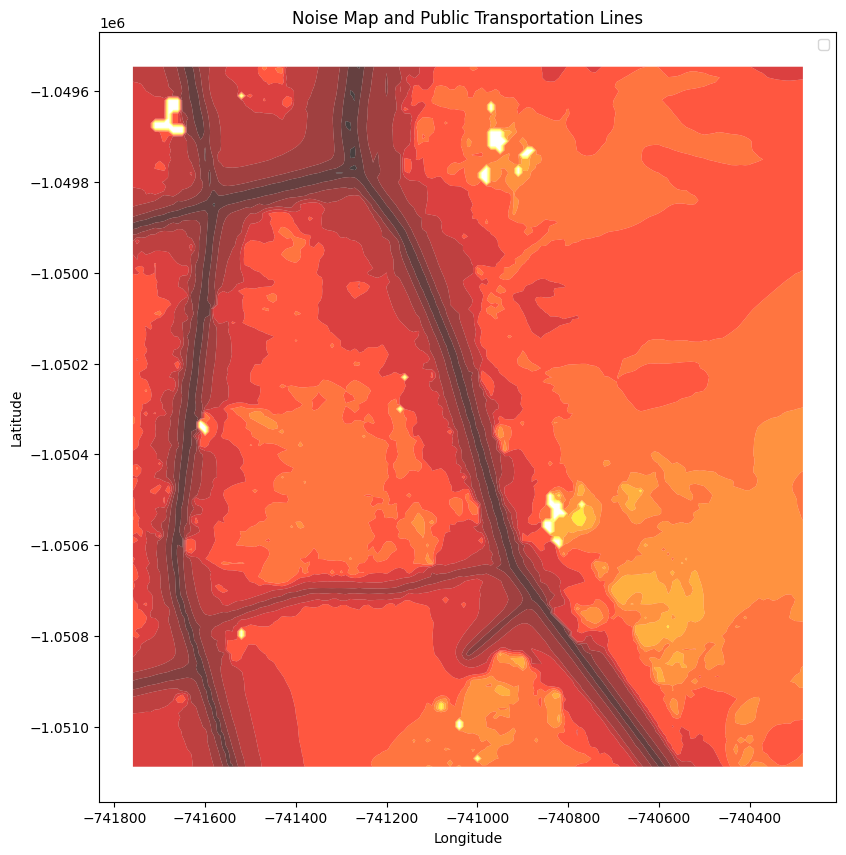

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)


# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [31]:
roads_for_pixel = gpd.clip(roads, picture)

C:\Users\kajet\AppData\Local\Temp\ipykernel_22952\1462096734.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


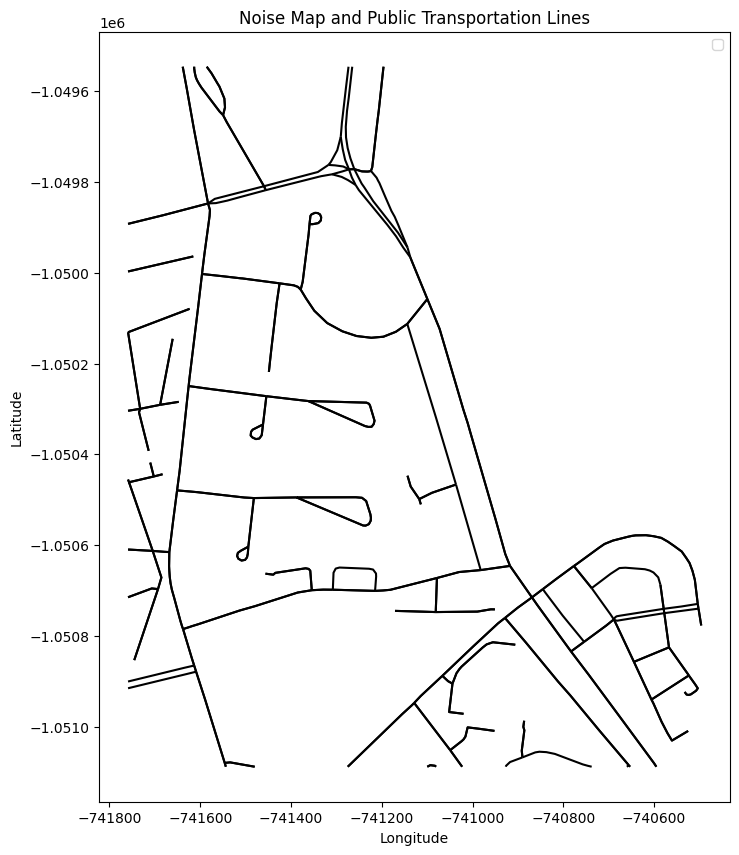

In [33]:
fig, ax = plt.subplots(figsize=(10, 10))


roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_22952\1633770927.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


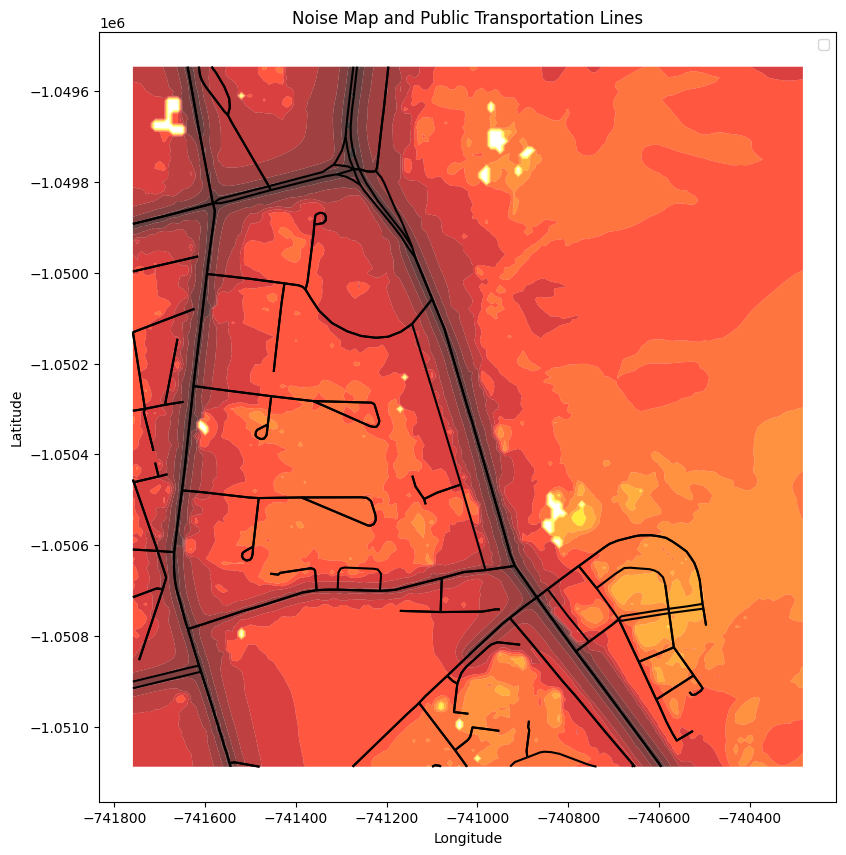

In [34]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [56]:
from shapely.ops import split
import geopandas
from shapely.geometry import MultiPolygon, Polygon
from shapely.geometry import LineString

def get_squares_from_rect(RectangularPolygon, side_length=0.0025):
    """
    Divide a Rectangle (Shapely Polygon) into squares of equal area.

    `side_length` : required side of square

    """
    rect_coords = np.array(RectangularPolygon.boundary.coords.xy)
    y_list = rect_coords[1]
    x_list = rect_coords[0]
    y1 = min(y_list)
    y2 = max(y_list)
    x1 = min(x_list)
    x2 = max(x_list)
    width = x2 - x1
    height = y2 - y1

    xcells = int(np.round(width / side_length))
    ycells = int(np.round(height / side_length))

    yindices = np.linspace(y1, y2, ycells + 1)
    xindices = np.linspace(x1, x2, xcells + 1)
    horizontal_splitters = [
        LineString([(x, yindices[0]), (x, yindices[-1])]) for x in xindices
    ]
    vertical_splitters = [
        LineString([(xindices[0], y), (xindices[-1], y)]) for y in yindices
    ]
    result = RectangularPolygon
    for splitter in vertical_splitters:
        result = MultiPolygon(split(result, splitter))
    for splitter in horizontal_splitters:
        result = MultiPolygon(split(result, splitter))
    square_polygons = list(result.geoms)

    return square_polygons


def split_polygon(G, number_of_pixels_on_side = 100, thresh=0.99):
    side_length = int(1500 / number_of_pixels_on_side)
    assert side_length>0, "side_length must be a float>0"
    Rectangle    = G.envelope
    squares      = get_squares_from_rect(Rectangle, side_length=side_length)
    SquareGeoDF  = geopandas.GeoDataFrame(squares).rename(columns={0: "geometry"})
    SquareGeoDF.set_geometry('geometry', inplace=True)
    Geoms        = SquareGeoDF[SquareGeoDF.intersects(G)].geometry.values
    geoms = [g for g in Geoms if ((g.intersection(G)).area / g.area) >= thresh]
    return geoms

In [67]:
pixels   = split_polygon(picture, thresh=0.99, number_of_pixels_on_side = 25)

In [68]:
pixels

[<POLYGON ((-738806.736 -1049545.973, -738865.781 -1049545.973, -738865.781 -...>,
 <POLYGON ((-738865.781 -1049545.973, -738924.827 -1049545.973, -738924.827 -...>,
 <POLYGON ((-738924.827 -1049545.973, -738983.872 -1049545.973, -738983.872 -...>,
 <POLYGON ((-738983.872 -1049545.973, -739042.918 -1049545.973, -739042.918 -...>,
 <POLYGON ((-739042.918 -1049545.973, -739101.963 -1049545.973, -739101.963 -...>,
 <POLYGON ((-739101.963 -1049545.973, -739161.009 -1049545.973, -739161.009 -...>,
 <POLYGON ((-739161.009 -1049545.973, -739220.054 -1049545.973, -739220.054 -...>,
 <POLYGON ((-739220.054 -1049545.973, -739279.1 -1049545.973, -739279.1 -1049...>,
 <POLYGON ((-739279.1 -1049545.973, -739338.146 -1049545.973, -739338.146 -10...>,
 <POLYGON ((-739338.146 -1049545.973, -739397.191 -1049545.973, -739397.191 -...>,
 <POLYGON ((-739397.191 -1049545.973, -739456.237 -1049545.973, -739456.237 -...>,
 <POLYGON ((-739456.237 -1049545.973, -739515.282 -1049545.973, -739515.282 -...>,
 <PO

In [69]:
pixels = geopandas.GeoDataFrame(pixels).rename(columns={0: "geometry"})
pixels.set_geometry('geometry', inplace=True)

In [70]:
pixels

,geometry
0,"POLYGON ((-738806.736 -1049545.973, -738865.78..."
1,"POLYGON ((-738865.781 -1049545.973, -738924.82..."
2,"POLYGON ((-738924.827 -1049545.973, -738983.87..."
3,"POLYGON ((-738983.872 -1049545.973, -739042.91..."
4,"POLYGON ((-739042.918 -1049545.973, -739101.96..."
...,...
645,"POLYGON ((-739101.963 -1048003.701, -739042.91..."
646,"POLYGON ((-739042.918 -1048003.701, -738983.87..."
647,"POLYGON ((-738983.872 -1048003.701, -738924.82..."
648,"POLYGON ((-738924.827 -1048003.701, -738865.78..."


C:\Users\kajet\AppData\Local\Temp\ipykernel_8164\1686622128.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


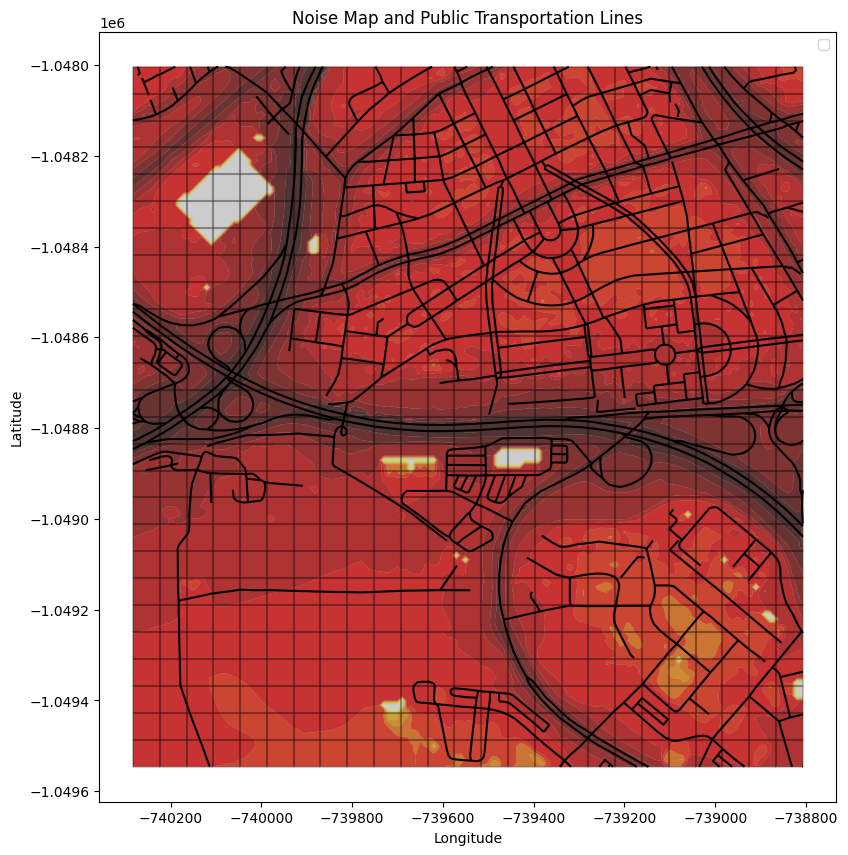

In [71]:
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)

roads_for_pixel.plot(ax=ax, alpha = 1, color="black",edgecolor="black", linewidth=1.5)
pixels.plot(ax=ax, alpha = 0.2, color="black",edgecolor="black", linewidth=1.5)

# Add a legend
ax.legend()

# Add title and labels
ax.set_title("Noise Map and Public Transportation Lines")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the map
plt.show()

In [76]:
pixels['has_road'] = pixels.geometry.apply(
    lambda square: roads_for_pixel.geometry.intersects(square).any()
)


In [77]:
pixels

,geometry,has_road
0,"POLYGON ((-738806.736 -1049545.973, -738865.78...",True
1,"POLYGON ((-738865.781 -1049545.973, -738924.82...",False
2,"POLYGON ((-738924.827 -1049545.973, -738983.87...",True
3,"POLYGON ((-738983.872 -1049545.973, -739042.91...",True
4,"POLYGON ((-739042.918 -1049545.973, -739101.96...",True
...,...,...
645,"POLYGON ((-739101.963 -1048003.701, -739042.91...",True
646,"POLYGON ((-739042.918 -1048003.701, -738983.87...",True
647,"POLYGON ((-738983.872 -1048003.701, -738924.82...",True
648,"POLYGON ((-738924.827 -1048003.701, -738865.78...",True


In [78]:
roads_for_pixel

,USEK_NAZ,DALNICE,TRIDASIL,TRIDAMK,TYPKOMUNIK,GLOBALID,MKN,SMEROVOST,SHAPE_LEN,geometry
10776,Na ovčíně-U Michelského lesa,0,0,0,33,{DAAD50E5-8CCB-4D4E-8371-1C88B8426DCF},NN1188,0,1230.464953,"LINESTRING (-740113.334 -1049545.973, -740117...."
43198,NN4942-NN1188,0,0,0,33,{39E5AC86-EE07-4AF6-8242-AD56E98E3120},U Michelského lesa,0,298.842883,"LINESTRING (-740141.7 -1048892, -740144.06 -10..."
3771,pokračování-pokračování,0,0,0,39,{C5A6B38C-8266-4061-BA21-5F882E986466},NN4942,0,52.184374,"LINESTRING (-740029.31 -1048962.98, -740037.96..."
3770,pokračování-pokračování,0,0,0,39,{5142D9AB-900F-4C9B-9480-E273484960C5},NN4942,0,72.013243,"LINESTRING (-740029.31 -1048962.98, -740008.99..."
3769,pokračování-pokračování,0,0,0,39,{D2009A2F-6DDC-4DAD-8EF3-89DE9753ADB2},NN4942,0,51.835151,"LINESTRING (-740032.61 -1048911.25, -740029.31..."
...,...,...,...,...,...,...,...,...,...,...
25577,Severovýchodní I-Severovýchodní II,0,0,3,3,{1FDF8BC4-CBE6-42C6-A20F-9B8DD9AF2174},Severní V,0,74.686009,"LINESTRING (-739444.281 -1048003.701, -739420 ..."
25664,Severní III-Severní IV,0,0,3,3,{534A6550-E572-461C-84BB-0AE7C7329B36},Severovýchodní II,0,67.082039,"LINESTRING (-739322.403 -1048003.701, -739349 ..."
25517,Severovýchodní I-Severovýchodní II,0,0,3,3,{FE02D7F1-5AA5-4777-9F8F-81D991AEC3A7},Severní IV,2,74.242845,"LINESTRING (-739355.851 -1048003.701, -739349 ..."
25646,NN4384-Severovýchodní I,0,0,3,3,{58D817A9-3EC8-4E21-865C-1333784AB294},Roztylské náměstí,0,24.793469,"LINESTRING (-739503.871 -1048003.701, -739501 ..."


C:\Users\kajet\AppData\Local\Temp\ipykernel_8164\1452690331.py:16: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")


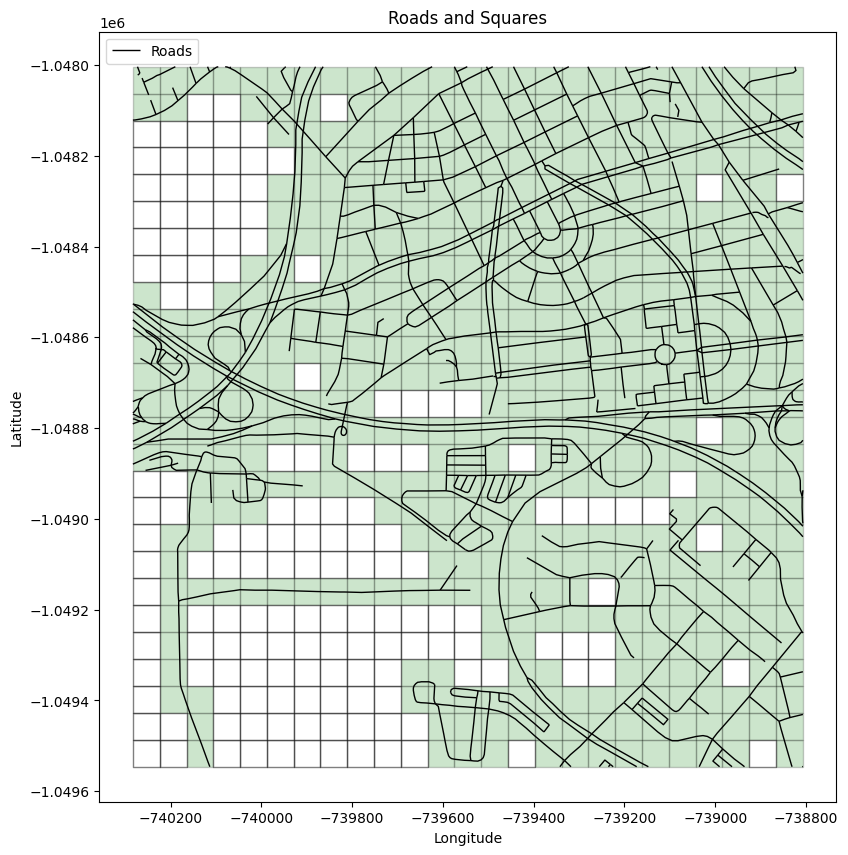

In [79]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the roads in black
roads_for_pixel.plot(ax=ax, color="black", linewidth=1, label="Roads")

# Plot the squares that contain roads in green
pixels[pixels['has_road']].plot(ax=ax, color="green", edgecolor="black", alpha=0.2, label="Squares with Roads")

# Plot the squares that do not contain roads in red
pixels[~pixels['has_road']].plot(ax=ax, color="white", edgecolor="black", alpha=0.5, label="Squares without Roads")

# Add legend
ax.legend(loc="upper left")

# Add title and labels
ax.set_title("Roads and Squares")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

C:\Users\kajet\AppData\Local\Temp\ipykernel_8164\4224376102.py:28: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc="upper left")


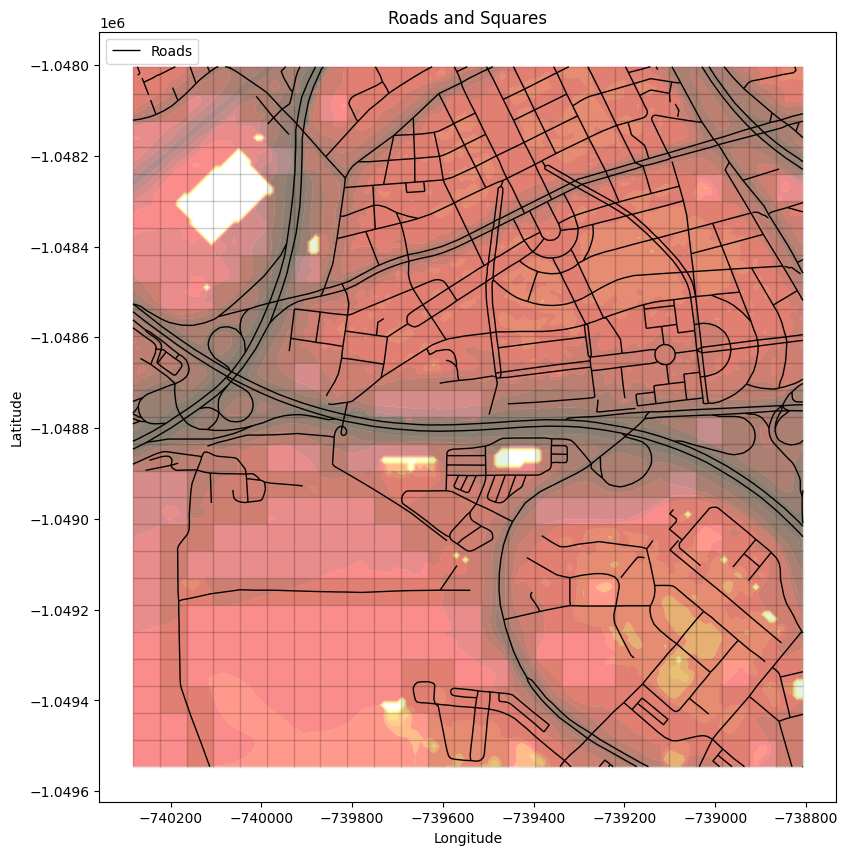

In [80]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.5,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the roads in black
roads_for_pixel.plot(ax=ax, color="black", linewidth=1, label="Roads")

# Plot the squares that contain roads in green
pixels[pixels['has_road']].plot(ax=ax, color="green", edgecolor="black", alpha=0.1, label="Squares with Roads")

# Plot the squares that do not contain roads in red
pixels[~pixels['has_road']].plot(ax=ax, color="white", edgecolor="black", alpha=0.1, label="Squares without Roads")

# Add legend
ax.legend(loc="upper left")

# Add title and labels
ax.set_title("Roads and Squares")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()

In [83]:
import osmnx as ox

# Define the city and data type
city = "Praha"
graph = ox.graph_from_place(city, network_type="drive")

# Extract roads and their attributes
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)

In [86]:
roads = edges.reset_index()
roads

,u,v,key,osmid,highway,lanes,name,oneway,reversed,length,geometry,maxspeed,tunnel,ref,access,bridge,junction,width,area
0,172512,25675011,0,4638042,residential,1,Zubatého,True,False,80.723358,"LINESTRING (14.40418 50.07692, 14.40415 50.076...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,172512,300107261,0,386347230,tertiary,2,Štefánikova,False,True,74.444500,"LINESTRING (14.40418 50.07692, 14.40419 50.077...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,172512,109901443,0,680477659,tertiary,2,Štefánikova,False,False,25.459633,"LINESTRING (14.40418 50.07692, 14.40417 50.076...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,172514,1235949539,0,481896765,tertiary,2,Újezd,False,True,18.991190,"LINESTRING (14.40472 50.07942, 14.40477 50.07959)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,172514,12439698422,0,4086144,tertiary,2,náměstí Kinských,False,False,83.648775,"LINESTRING (14.40472 50.07942, 14.40465 50.079...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49874,12507420456,12507420458,0,1351870406,residential,NaN,NaN,False,True,7.799731,"LINESTRING (14.48818 50.04925, 14.48807 50.04926)",NaN,NaN,NaN,delivery,NaN,NaN,NaN,NaN
49875,12507420458,12507420456,0,1351870406,residential,NaN,NaN,False,False,7.799731,"LINESTRING (14.48807 50.04926, 14.48818 50.04925)",NaN,NaN,NaN,delivery,NaN,NaN,NaN,NaN
49876,12507420458,12507420459,0,1351870408,residential,NaN,NaN,False,False,16.862477,"LINESTRING (14.48807 50.04926, 14.48804 50.04911)",NaN,NaN,NaN,delivery,NaN,NaN,NaN,NaN
49877,12507420458,768265538,0,"[1351870409, 89123945, 1351870406]",residential,NaN,Měchenická,False,True,64.221608,"LINESTRING (14.48807 50.04926, 14.48776 50.049...",50,NaN,NaN,delivery,NaN,NaN,NaN,NaN


In [87]:
roads_for_pixel = gpd.clip(roads, picture)

In [89]:
roads_for_pixel.set_geometry('geometry', inplace=True)

ValueError: aspect must be finite and positive 

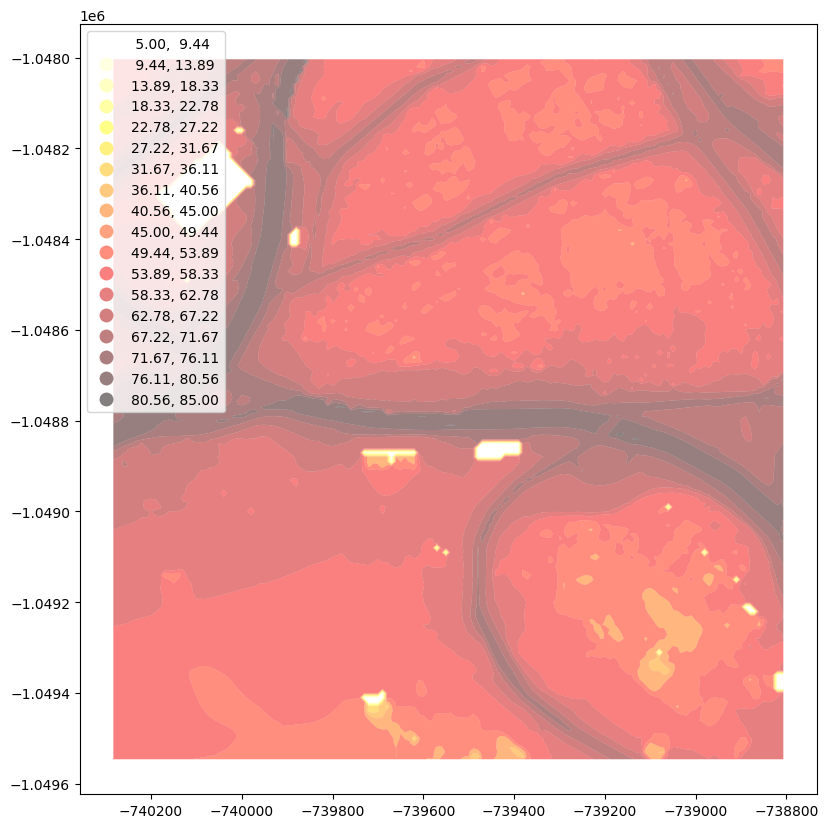

In [90]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

noise_for_pixel.plot(
    column="DB_HI",
    cmap="hot_r",
    scheme="quantiles",
    k=noise.shape[0],
    edgecolor="white",
    linewidth=0.0,
    alpha=0.5,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)
# Plot the roads in black
roads_for_pixel.plot(ax=ax, color="black", linewidth=1, label="Roads")

# Plot the squares that contain roads in green
pixels[pixels['has_road']].plot(ax=ax, color="green", edgecolor="black", alpha=0.1, label="Squares with Roads")

# Plot the squares that do not contain roads in red
pixels[~pixels['has_road']].plot(ax=ax, color="white", edgecolor="black", alpha=0.1, label="Squares without Roads")

# Add legend
ax.legend(loc="upper left")

# Add title and labels
ax.set_title("Roads and Squares")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show the plot
plt.show()